## Import Libraries and initialize other values

In [137]:
# import libraries
import pandas as pd
import os
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import sklearn
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
import xgboost
import datetime
from sklearn.ensemble import VotingClassifier
from sklearn.svm import SVC
from sklearn.metrics import (accuracy_score, f1_score, confusion_matrix, recall_score, 
                             precision_score, roc_curve, roc_auc_score)

In [138]:
# set pandas parameters
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 50)

## Import and clean data

In [139]:
# set paths
directory_path = 'bank-additional'
file_name = 'bank-additional-full.csv'

In [140]:
# import data
df_raw = pd.read_csv(file_name, sep = ';',
                     dtype = {'y' : 'category'})

# view shape
df_raw.shape

(41188, 21)

In [141]:
# encode target variable as 0 and 1
df_raw['y'] = df_raw['y'].cat.codes

In [142]:
# view sample rows
df_raw.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0


In [143]:
# view column details
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
age               41188 non-null int64
job               41188 non-null object
marital           41188 non-null object
education         41188 non-null object
default           41188 non-null object
housing           41188 non-null object
loan              41188 non-null object
contact           41188 non-null object
month             41188 non-null object
day_of_week       41188 non-null object
duration          41188 non-null int64
campaign          41188 non-null int64
pdays             41188 non-null int64
previous          41188 non-null int64
poutcome          41188 non-null object
emp.var.rate      41188 non-null float64
cons.price.idx    41188 non-null float64
cons.conf.idx     41188 non-null float64
euribor3m         41188 non-null float64
nr.employed       41188 non-null float64
y                 41188 non-null int8
dtypes: float64(5), int64(5), int8(1), object(10)
mem

In [144]:
# view basic columns details
df_raw.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911,0.112654
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528,0.316173
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000,0.000000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000,0.000000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000,0.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000,0.000000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000,1.000000


#### Analyze various columns

In [145]:
df_raw.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [146]:
df_raw['job'].value_counts() # missing values - medium

admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: job, dtype: int64

In [147]:
df_raw['marital'].value_counts() # missing values - low

married     24928
single      11568
divorced     4612
unknown        80
Name: marital, dtype: int64

In [148]:
df_raw['education'].value_counts() # missing values - low

university.degree      12168
high.school             9515
basic.9y                6045
professional.course     5243
basic.4y                4176
basic.6y                2292
unknown                 1731
illiterate                18
Name: education, dtype: int64

In [149]:
df_raw['default'].value_counts() # missing values - low

no         32588
unknown     8597
yes            3
Name: default, dtype: int64

In [150]:
df_raw['housing'].value_counts() # missing values - low

yes        21576
no         18622
unknown      990
Name: housing, dtype: int64

In [151]:
df_raw['loan'].value_counts() # missing values - low

no         33950
yes         6248
unknown      990
Name: loan, dtype: int64

In [152]:
df_raw['contact'].value_counts() # missing values - nil

cellular     26144
telephone    15044
Name: contact, dtype: int64

In [153]:
df_raw['month'].value_counts() # missing values - nil

may    13769
jul     7174
aug     6178
jun     5318
nov     4101
apr     2632
oct      718
sep      570
mar      546
dec      182
Name: month, dtype: int64

In [154]:
df_raw['day_of_week'].value_counts() # missing values - nil

thu    8623
mon    8514
wed    8134
tue    8090
fri    7827
Name: day_of_week, dtype: int64

In [155]:
df_raw['poutcome'].value_counts() # very high value of non-existent

nonexistent    35563
failure         4252
success         1373
Name: poutcome, dtype: int64

In [156]:
df_raw['y'].value_counts() # missing valies - nil

0    36548
1     4640
Name: y, dtype: int64

In [157]:
# replace missing values for each column
df_raw.replace(to_replace = 'unknown', 
               value = {'job' : 'unemployed',
                        'marital' : 'single',
                        'education' : 'illiterate',
                        'default' : 'no',
                        'housing' : 'no',
                        'loan' : 'no'},
              inplace = True)

# Q1. Does the overall engagement lead to a client opting for a FD?

### We shall attemp to answer this using the association of the below variables with the response variable (y):
1. previous: number of contacts performed before this campaign and for this client
2. pdays: number of days that passed by after the client was last contacted from a previous campaign
3. poutcome: outcome of the previous marketing campaign

### 1. Previous

In [158]:
df_raw['previous'].mean()

0.17296299893172767

In [159]:
df_raw['previous'].value_counts()

0    35563
1     4561
2      754
3      216
4       70
5       18
6        5
7        1
Name: previous, dtype: int64

In [160]:
df_raw['previous_bin'] = pd.cut(x = df_raw['previous'], 
                                bins = [0, 1, 3, 6, df_raw['previous'].max()],
                                right = False,
                                labels = ['No contact', '1-2', '3-5', '>5']
                               )

In [161]:
df_raw.groupby(by = 'previous_bin')['y'].mean()

previous_bin
No contact    0.088322
1-2           0.247789
3-5           0.588816
>5            0.600000
Name: y, dtype: float64

Text(0, 0.5, 'Mean Conversion Rate')

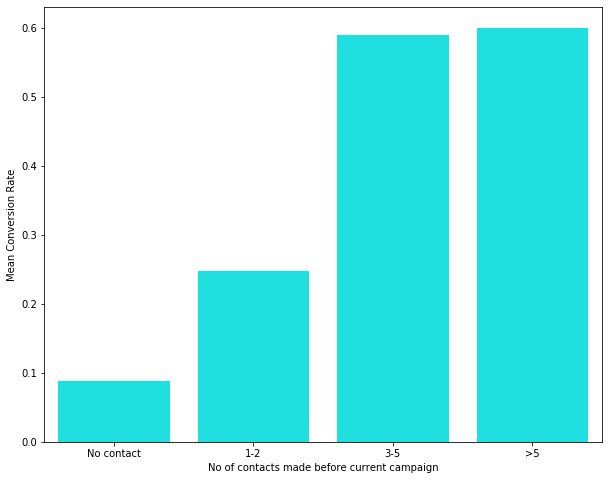

In [162]:
plt.figure(figsize = (10, 8))
sns.barplot(data = df_raw, x = 'previous_bin', y = 'y', color = 'cyan', ci = None)
plt.xlabel('No of contacts made before current campaign')
plt.ylabel('Mean Conversion Rate')

#### Conclusion: Figure 1 above clearly shows that higher number of connects with consumers prior to a new campaign lead to a better conversion rate in a new campaign. Consumers with 3–5 or >5 connects had the highest conversion rate of close to 60% as against consumers which had not been contacted previously or were contacted less than thrice

### 2. Pdays

In [163]:
df_raw.replace({'pdays': {999 : -1}}, inplace = True)

In [164]:
df_raw['pdays_bin'] = pd.cut(x = df_raw['pdays'], 
                             bins = [-1, 0, 2, 5, 11, df_raw['pdays'].max()],
                             right = False,
                             labels = ['Not contact', '0-1', '2-4', '5-10', '>10']
                            )

In [165]:
df_raw.groupby(by = 'pdays_bin')['y'].mean()

pdays_bin
Not contact    0.092582
0-1            0.439024
2-4            0.644013
5-10           0.667178
>10            0.566502
Name: y, dtype: float64

Text(0, 0.5, 'Mean Conversion Rate')

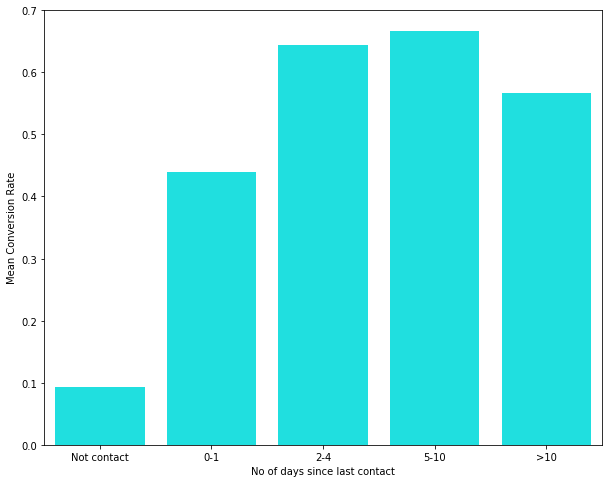

In [166]:
plt.figure(figsize = (10, 8))
sns.barplot(data = df_raw, x = 'pdays_bin', y = 'y', color = 'cyan', ci = None)
plt.xlabel('No of days since last contact')
plt.ylabel('Mean Conversion Rate')

#### Conclusion: Consumers which have not been contacted have the least success rate. Clients which have been very recently contacted don't necessarily respond best towards a new campaign, as evidenced by the second lowest success rate of 0–1 days category. Where the contact was made 2–10 days had the highest chance of success. As the last contact goes beyond 10 days, we see a dip in the success rate.

### 3. Poutcome

In [167]:
df_raw.groupby(by = 'poutcome')['y'].mean()

poutcome
failure        0.142286
nonexistent    0.088322
success        0.651129
Name: y, dtype: float64

Text(0, 0.5, 'Mean Conversion Rate')

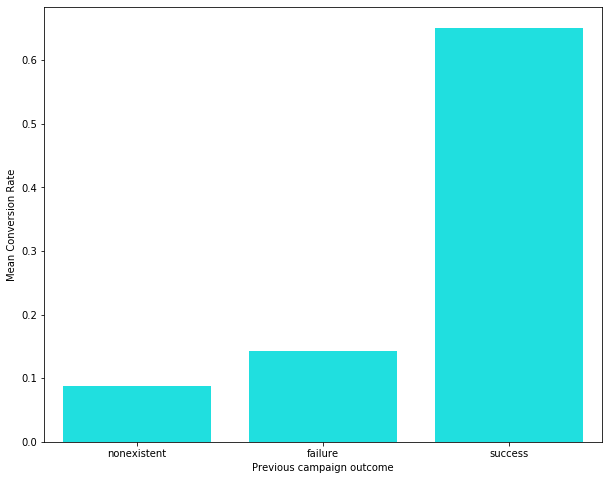

In [168]:
plt.figure(figsize = (10, 8))
sns.barplot(data = df_raw, x = 'poutcome', y = 'y', color = 'cyan', ci = None)
plt.xlabel('Previous campaign outcome')
plt.ylabel('Mean Conversion Rate')

# Does the market rate determine whether a customer will take up a FD or not?

In [169]:
df_raw['month_encoded'] = [datetime.datetime.strptime(d, '%b').month for d in df_raw['month']]

Text(0, 0.5, '3M Euribor')

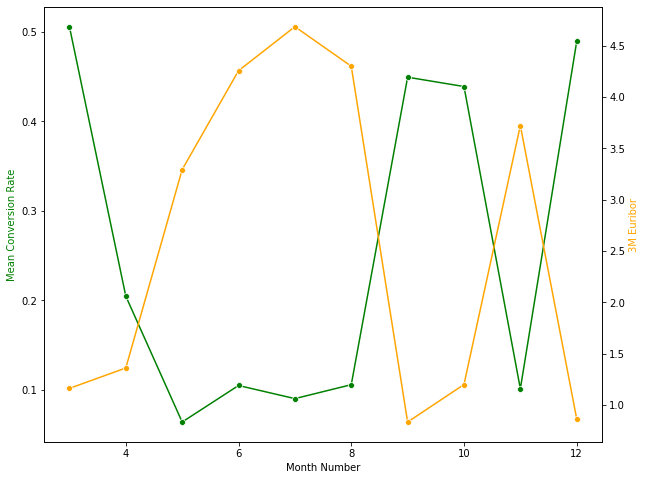

In [170]:
fig, ax = plt.subplots(figsize = (10, 8))
sns.lineplot(data = df_raw, x = 'month_encoded', y = 'y', color = 'green', ci = None, marker = 'o')
plt.xlabel('Month Number')
plt.ylabel('Mean Conversion Rate', color = 'green')

ax2 = ax.twinx()
sns.lineplot(data = df_raw, x = 'month_encoded', y = 'euribor3m', color = 'orange', ci = None, marker = 'o')
plt.ylabel('3M Euribor', color = 'orange')

In [171]:
df_raw['euribor_bin'] = pd.cut(x = df_raw['euribor3m'], 
                               bins = [0, 0.2, 0.5, 1, 2, 3, df_raw['previous'].max()])

In [172]:
df_raw.groupby(by = 'euribor_bin')['y'].mean()

euribor_bin
(0.0, 0.2]         NaN
(0.2, 0.5]         NaN
(0.5, 1.0]    0.457011
(1.0, 2.0]    0.157977
(2.0, 3.0]         NaN
(3.0, 7.0]    0.048357
Name: y, dtype: float64

Text(0, 0.5, 'Mean Conversion Rate')

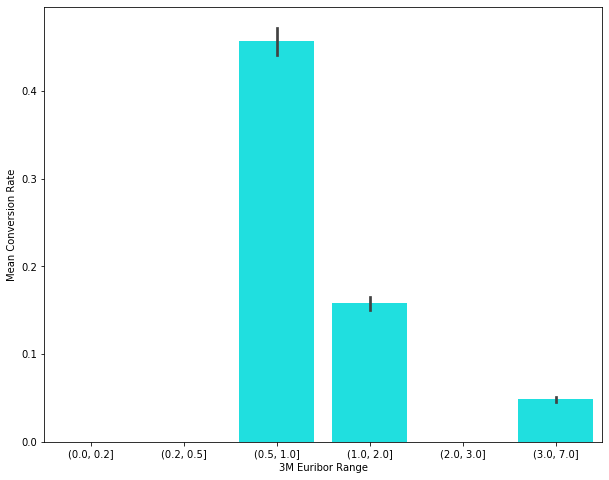

In [173]:
plt.figure(figsize = (10, 8))
sns.barplot(data = df_raw, x = 'euribor_bin', y = 'y', color = 'cyan')
plt.xlabel('3M Euribor Range')
plt.ylabel('Mean Conversion Rate')

#### Conclusion: The above chart plots movements of 3M Euribor (an external rate benchmark) and conversion rate across months when the campaign was run in the data. We see an inverse relationship between the 2 metrics i.e. with increase in the external benchmark, the success rate falls and vice versa. The above seems to be counter-intuitive from a business sense as consumers should, ideally, be placing more bank FDs as rates increase. One reason of these negative relationship could be that the bank (being studied in the data set) may be slow in passing on the market rate changes to its consumers.

# Start modelling process

#### Split data into training and test set

In [174]:
# create stratified shuffle split object
sss = StratifiedShuffleSplit(n_splits = 2, test_size = 0.2, random_state = 42)

In [175]:
# reset index
df_raw.reset_index(inplace = True, drop = True)

# split between train and test dfs
for train_indices, test_indices in sss.split(df_raw, df_raw['y']):
    df_train = df_raw.loc[train_indices]
    df_test = df_raw.loc[test_indices]

print('Train data shape:', df_train.shape)
print('Test data shape:', df_test.shape)

Train data shape: (32950, 25)
Test data shape: (8238, 25)


In [176]:
print('Incidence rate in total data :', df_raw['y'].sum() / df_raw.shape[0])
print('Incidence rate in training data :', df_train['y'].sum() / df_train.shape[0])
print('Incidence rate in test data :', df_test['y'].sum() / df_test.shape[0])

Incidence rate in total data : 0.11265417111780131
Incidence rate in training data : 0.11265553869499241
Incidence rate in test data : 0.11264870114105366


#### Create pipeline for data transformation

In [177]:
df_raw.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,previous_bin,pdays_bin,month_encoded,euribor_bin
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,-1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,No contact,Not contact,5,"(3.0, 7.0]"
1,57,services,married,high.school,no,no,no,telephone,may,mon,149,1,-1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,No contact,Not contact,5,"(3.0, 7.0]"
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,-1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,No contact,Not contact,5,"(3.0, 7.0]"
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,-1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,No contact,Not contact,5,"(3.0, 7.0]"
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,-1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,No contact,Not contact,5,"(3.0, 7.0]"


In [178]:
# create transformer for yes/no columns
class encode_categorical_cols(BaseEstimator, TransformerMixin):
    def __init__(self):
        return None
    
    def fit(self, X, y = None):
        return self
    
    def transform(self, X, y = None):
        X = pd.get_dummies(X, prefix = X.columns, prefix_sep = '_', drop_first = True, sparse = False)
        self.categories_ = X.columns
        return X

In [179]:
# define numeric cols
num_cols = ['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate', 
            'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']

In [180]:
# define categorical cols
cat_cols = ['job', 'marital', 'education', 'default', 'housing', 
            'loan', 'contact', 'month', 'day_of_week', 'poutcome']

In [181]:
# column transformer for standard scaler and one hot encoding
full_pipeline = ColumnTransformer([
    ('num', StandardScaler(), num_cols),
    ('cat', encode_categorical_cols(), cat_cols)
], remainder = 'drop')

In [182]:
## create X and y sets for training and testing data
# training data
X_train = full_pipeline.fit_transform(df_train)
y_train = df_train['y']

# testing data
X_test = full_pipeline.transform(df_test)
y_test = df_test['y']

In [183]:
# create list of variables
cat_encoder = full_pipeline.named_transformers_['cat']
cat_attribs = cat_encoder.categories_.tolist()

attributes = num_cols + cat_attribs

### Try different models

#### Logistic Regression

In [184]:
# initialize model object
log_mod = LogisticRegression(n_jobs = -1, 
                             solver = 'lbfgs', 
                             max_iter = 500)

In [185]:
# fit training data
log_mod.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=500,
                   multi_class='warn', n_jobs=-1, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [186]:
# view accuracy on training and test data
print('Training data accuracy:', accuracy_score(y_train, log_mod.predict(X_train)))
print('Test data accuracy:', accuracy_score(y_test, log_mod.predict(X_test)))

# view precision and recall on test data
print('Test Data Precision:', precision_score(y_test, log_mod.predict(X_test)))
print('Test Data Recall:', recall_score(y_test, log_mod.predict(X_test)))

Training data accuracy: 0.9097723823975721
Test data accuracy: 0.9170915270696771
Test Data Precision: 0.7231329690346083
Test Data Recall: 0.42780172413793105


In [187]:
# view confusion matrix on test data
confusion_matrix(y_test, log_mod.predict(X_test)) # actuals in rows

array([[7158,  152],
       [ 531,  397]])

#### Random Forest

In [188]:
# initialize model object
rf_mod = RandomForestClassifier()

# create grid search object
param_grid_rf = {'n_estimators' : [150],
                 'criterion' : ['gini', 'entropy'],
                 'max_depth' : [25, 50, 75],
                 'min_samples_leaf' : [15, 20, 50]}

# create grid search object
grid_rf = GridSearchCV(rf_mod, param_grid = param_grid_rf, n_jobs = -1, 
                       scoring = 'accuracy', cv = 3,  verbose = 2)

In [189]:
# fit training data
grid_rf.fit(X_train, y_train)

Fitting 3 folds for each of 18 candidates, totalling 54 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   24.0s
[Parallel(n_jobs=-1)]: Done  54 out of  54 | elapsed:   37.9s finished


GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
             iid

In [190]:
# view best params
grid_rf.best_params_

{'criterion': 'gini',
 'max_depth': 50,
 'min_samples_leaf': 15,
 'n_estimators': 150}

In [191]:
# save the best model
rf_best = grid_rf.best_estimator_

In [192]:
# view accuracy on training and test data
print('Training data accuracy:', accuracy_score(y_train, rf_best.predict(X_train)))
print('Test data accuracy:', accuracy_score(y_test, rf_best.predict(X_test)))

# view precision and recall on test data
print('Test Data Precision:', precision_score(y_test, rf_best.predict(X_test)))
print('Test Data Recall:', recall_score(y_test, rf_best.predict(X_test)))

Training data accuracy: 0.923763277693475
Test data accuracy: 0.9124787569798495
Test Data Precision: 0.7368421052631579
Test Data Recall: 0.34698275862068967


In [193]:
# view confusion matrix on test data
confusion_matrix(y_test, rf_best.predict(X_test)) # actuals in rows

array([[7195,  115],
       [ 606,  322]])

In [194]:
# view feature importances
sorted(zip(rf_best.feature_importances_, attributes), reverse = True)

[(0.39364965758233567, 'duration'),
 (0.11346068089281618, 'nr.employed'),
 (0.10223591498138843, 'euribor3m'),
 (0.06386407469495291, 'pdays'),
 (0.04879906363190426, 'cons.conf.idx'),
 (0.04842717733387818, 'poutcome_success'),
 (0.04410264153422152, 'emp.var.rate'),
 (0.034502805402922825, 'cons.price.idx'),
 (0.027166420913764432, 'age'),
 (0.01336108324955852, 'previous'),
 (0.009651036295322223, 'contact_telephone'),
 (0.009403258926486618, 'campaign'),
 (0.008876125722312828, 'poutcome_nonexistent'),
 (0.008163306355700305, 'month_may'),
 (0.008095914096026353, 'month_oct'),
 (0.007388912054482904, 'month_mar'),
 (0.004849194469271724, 'education_university.degree'),
 (0.004820039285507484, 'day_of_week_mon'),
 (0.004064099256787087, 'day_of_week_thu'),
 (0.0038668912075754246, 'housing_yes'),
 (0.003565886876889767, 'marital_married'),
 (0.0033603183743017287, 'marital_single'),
 (0.002743369183449754, 'day_of_week_tue'),
 (0.0026551242401500466, 'job_blue-collar'),
 (0.0026319

#### GBM

In [195]:
# initialize model object
gbm_mod = GradientBoostingClassifier()

# create grid search object
param_grid_gbm = {'n_estimators' : [100, 500],
                 'learning_rate' : [0.01, 0.1],
                 'max_depth' : [1, 3, 5, 10],
                 'subsample' : [0.5, 1]}

# create grid search object
grid_gbm = GridSearchCV(gbm_mod, param_grid = param_grid_gbm, n_jobs = -1, 
                       scoring = 'accuracy', cv = 3,  verbose = 2)

In [ ]:
# fit training data
grid_gbm.fit(X_train, y_train)

Fitting 3 folds for each of 32 candidates, totalling 96 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:  1.2min


In [ ]:
# view best params
grid_gbm.best_params_

In [ ]:
# save the best model
gbm_best = grid_gbm.best_estimator_

In [ ]:
# view accuracy on training and test data
print('Training data accuracy:', accuracy_score(y_train, gbm_best.predict(X_train)))
print('Test data accuracy:', accuracy_score(y_test, gbm_best.predict(X_test)))

# view precision and recall on test data
print('Test Data Precision:', precision_score(y_test, gbm_best.predict(X_test)))
print('Test Data Recall:', recall_score(y_test, gbm_best.predict(X_test)))

In [ ]:
# view confusion matrix on test data
confusion_matrix(y_test, gbm_best.predict(X_test)) # actuals in rows

In [ ]:
# view feature importances
# sorted(zip(gbm_best.feature_importances_, attributes), reverse = True)

#### XG Boost

In [ ]:
# define imbalance ratio
imbalance_ratio = (y_train.count() - y_train.sum()) / y_train.sum()

# initialize model object
xgb_mod = xgboost.XGBClassifier(objective = 'binary:logistic',
                                scale_pos_weight = imbalance_ratio
                               )

# create grid search object
param_grid_xgb = {'n_estimators' : [200],
                  'learning_rate' : [0.01, 0.1],
                  'max_depth' : [5, 10, 25],
                  'subsample' : [0.25, 0.5, 1],
                  'colsample_bytree' : [1],
                  'colsample_bylevel' : [0.5, 1],}

# # create grid search object
grid_xgb = GridSearchCV(xgb_mod, param_grid = param_grid_xgb, n_jobs = -1, 
                        scoring = 'accuracy', cv = 5,  verbose = 2)

In [ ]:
# fit training data
grid_xgb.fit(X_train, y_train)

In [ ]:
# view best params
grid_xgb.best_params_

In [ ]:
# save the best model
xgb_best = grid_xgb.best_estimator_

In [ ]:
# view accuracy on training and test data
print('Training data accuracy:', accuracy_score(y_train, xgb_best.predict(X_train)))
print('Test data accuracy:', accuracy_score(y_test, xgb_best.predict(X_test)))

# view precision and recall on test data
print('Test Data Precision:', precision_score(y_test, xgb_best.predict(X_test)))
print('Test Data Recall:', recall_score(y_test, xgb_best.predict(X_test)))

In [ ]:
# view confusion matrix on test data
confusion_matrix(y_test, xgb_best.predict(X_test)) # actuals in rows